In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/MyDrive/Advanced_Data_Augmentation"

Mounted at /content/drive
/content/drive/MyDrive/Advanced_Data_Augmentation


In [2]:
!pip3 install pickle5

In [3]:
import models
from utils import progress_bar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm

import surrounding_augmentation as sn
import environment_helpers as hp
from random import randrange
import pickle5 as pickle
from PIL import Image
#!pip install cifar2png

In [4]:
#!/usr/bin/env python3 -u
# Copyright (c) 2017-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the LICENSE file in
# the root directory of this source tree.
from __future__ import print_function

import argparse
import csv
import os

import numpy as np
import torch
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import cv2 as cv2

#import sys  
#sys.path.insert(0, '/content/gdrive/MyDrive/Advanced_Data_Augmentation')




# parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
# parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
# parser.add_argument('--resume', '-r', action='store_true',
#                     help='resume from checkpoint')
# parser.add_argument('--model', default="ResNet18", type=str,
#                     help='model type (default: ResNet18)')
# parser.add_argument('--name', default='0', type=str, help='name of run')
# parser.add_argument('--seed', default=0, type=int, help='random seed')
# parser.add_argument('--batch-size', default=128, type=int, help='batch size')
# parser.add_argument('--epoch', default=200, type=int,
#                     help='total epochs to run')
# parser.add_argument('--no-augment', dest='augment', action='store_false',
#                     help='use standard augmentation (default: True)')
# parser.add_argument('--decay', default=1e-4, type=float, help='weight decay')
# parser.add_argument('--alpha', default=1., type=float,
#                     help='mixup interpolation coefficient (default: 1)')
# args = parser.parse_args()

params = {
    "lr": .01,
    "resume": False,
    "model": "ResNet18",
    "name": "mixup-128-NormalAdvsTrain",
    "seed": 10,
    "batch_size": 128,
    "decay": 5e-4, 
    "augment": True,
    "epoch": 200,
#     "no_augment": False,
    "alpha": 0.,
}

# %cd ../../

In [5]:
def augment_environment(image_batch,mean,std,showImage=-1):
 inv_normalize = transforms.Normalize(
    mean= [-m/s for m, s in zip(mean, std)],
    std= [1/s for s in std]
  )
 inv_tensor = inv_normalize(image_batch)*255
 inv_tensor = inv_tensor.permute(0,2,3,1)
 img_arr=inv_tensor.numpy().astype('uint8')
 aug_list=[]
 for i in range(len(img_arr)):
  aug_images= sn.augment_random(img_arr[i], aug_types=['random_brightness','add_shadow','add_gravel','add_snow','add_rain','add_autumn','random_flip','random_brightness'], volume='expand')  ##all aug_types are applied in both images
  rand_image=aug_images[randrange(7)]
  if showImage != -1:
    plt.imshow(rand_image)
    plt.show()
  rand_image=torch.from_numpy(np.transpose(rand_image, (2, 0, 1))).float()/255
  normalizer = transforms.Normalize(
    mean= mean,
    std= std
   )
  new_image=normalizer(rand_image)
  aug_list.append(new_image)
 aug_batch=torch.stack(aug_list)
 return aug_batch

128


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([3, 32, 32])


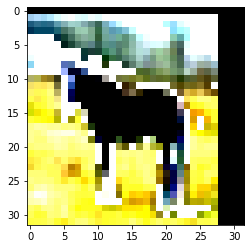

In [7]:
image_batch = pickle.load( open( "images_sample.pickle", "rb" ) )
print(len(image_batch))
mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)
aug_image_batch= augment_environment(image_batch, mean,std)
print(aug_image_batch.shape)
print(aug_image_batch[0].shape)
plt.imshow(aug_image_batch[0].numpy().transpose(1,2,0))